In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=09a89905bc1626e01fb0d4249a6452f38b2953ab3dc83e889e6f435c90b5ed85
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [3]:
import pandas as pd
import ta
import numpy as np
!pip install mplfinance
import matplotlib.pyplot as plt
import mplfinance as mpf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.1 MB/s eta 0:00:00


#Data Aguas Andina

In [4]:
df_aguas_a = pd.read_csv('AGUAS_A.csv', index_col = 'Date')
print(df_aguas_a)

              Open    High     Low   Close   Volume
Date                                               
2014-04-21  342.35  343.50  342.00  343.20  1332972
2014-04-22  342.00  343.00  340.00  340.86  1284030
2014-04-23  340.86  343.01  341.51  342.00  1048269
2014-04-24  342.00  342.00  340.50  340.70  1282877
2014-04-25  340.70  341.00  339.50  339.65   704015
...            ...     ...     ...     ...      ...
2024-04-15  280.00  280.78  275.01  278.00  3463336
2024-04-16  278.00  278.73  272.00  276.99  6160229
2024-04-17  276.99  276.00  273.00  273.54  2018624
2024-04-18  273.50  275.00  270.50  273.53  2194508
2024-04-19  273.53  273.87  265.02  265.02  4176063

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [5]:
df_aguas_a['aguas_a_sma_200'] = ta.trend.sma_indicator(df_aguas_a['Close'], window = 200)
df_aguas_a[['Close','aguas_a_sma_200']].iloc[199]

Close              365.3100
aguas_a_sma_200    355.0693
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [6]:
df_aguas_a['msa200_aguas_a'] = np.nan
i = 199
while i <= (df_aguas_a.shape[0]-1):
  if df_aguas_a['Close'].iloc[i] > df_aguas_a['aguas_a_sma_200'].iloc[i]:
    df_aguas_a['msa200_aguas_a'].iloc[i] = 1
  else:
    df_aguas_a['msa200_aguas_a'].iloc[i] = 0
  i += 1


#Data Andina B

In [94]:
df_andina = pd.read_csv('ANDINA_B.csv', index_col = 'Date')
print(df_andina)

              Open    High     Low   Close   Volume
Date                                               
2014-04-21  2338.0  2338.0  2230.0  2284.7   148845
2014-04-22  2284.7  2270.0  2237.8  2250.0   940452
2014-04-23  2250.0  2255.0  2221.0  2229.1   713034
2014-04-24  2229.1  2263.0  2186.0  2214.7   568845
2014-04-25  2214.7  2192.6  2155.0  2173.9    76409
...            ...     ...     ...     ...      ...
2024-04-15  2578.0  2604.0  2500.0  2553.0  1016598
2024-04-16  2553.0  2565.5  2521.1  2551.1   245819
2024-04-17  2551.1  2608.5  2551.0  2570.0   938613
2024-04-18  2570.0  2629.6  2551.0  2615.0  1069148
2024-04-19  2615.0  2625.0  2569.1  2615.0   426572

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [95]:
df_andina['andina_b_sma_200'] = ta.trend.sma_indicator(df_andina['Close'], window = 200)
df_andina[['Close','andina_b_sma_200']].iloc[199]

Close               1775.3000
andina_b_sma_200    1957.4075
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [96]:
df_andina['msa200_andina_b'] = np.nan
i = 199
while i <= (df_andina.shape[0]-1):
  if df_andina['Close'].iloc[i] > df_andina['andina_b_sma_200'].iloc[i]:
    df_andina['msa200_andina_b'].iloc[i] = 1
  else:
    df_andina['msa200_andina_b'].iloc[i] = 0
  i += 1

#Data BCI

In [10]:
df_bci = pd.read_csv('BCI.csv', index_col = 'Date')
print(df_bci)

                 Open       High        Low      Close  Volume
Date                                                          
2014-04-21  21619.012  21625.574  21231.785  21355.828   15639
2014-04-22  21355.828  21592.758  20870.812  21011.920   13876
2014-04-23  21011.920  20936.443  20411.390  20473.086   43420
2014-04-24  20473.086  20629.287  20346.416  20457.334   49212
2014-04-25  20457.334  20581.377  20378.576  20480.960   52162
...               ...        ...        ...        ...     ...
2024-04-15  27851.000  28200.000  27301.000  27420.000  100674
2024-04-16  27400.000  27553.000  26601.000  26812.000  108449
2024-04-17  26812.000  27360.000  26400.000  26609.000  152702
2024-04-18  26609.000  27500.000  26600.000  27359.000  151961
2024-04-19  27300.000  27445.000  26800.000  26800.000   34516

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [11]:
df_bci['bci_sma_200'] = ta.trend.sma_indicator(df_bci['Close'], window = 200)
df_bci[['Close','bci_sma_200']].iloc[199]

Close          19207.736
bci_sma_200    20893.623
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [12]:
df_bci['msa200_bci'] = np.nan
i = 199
while i <= (df_bci.shape[0]-1):
  if df_bci['Close'].iloc[i] > df_bci['bci_sma_200'].iloc[i]:
    df_bci['msa200_bci'].iloc[i] = 1
  else:
    df_bci['msa200_bci'].iloc[i] = 0
  i += 1

#Data BSANTANDER

In [13]:
df_bsantander = pd.read_csv('BSANTANDER.csv', index_col = 'Date')
print(df_bsantander)

             Open   High    Low  Close     Volume
Date                                             
2014-04-21  32.84  33.00  32.40  32.59   25520470
2014-04-22  32.59  32.70  32.01  32.35   68148360
2014-04-23  32.35  33.00  32.10  32.23   43694880
2014-04-24  32.23  32.32  31.89  32.24   64038920
2014-04-25  32.24  32.50  32.15  32.25   59901136
...           ...    ...    ...    ...        ...
2024-04-15  46.33  46.55  45.85  46.08  132448952
2024-04-16  46.08  47.03  45.06  45.79  202465600
2024-04-17  45.80  46.10  45.00  45.85  146006480
2024-04-18  45.85  46.15  45.32  45.50  220339840
2024-04-19  43.99  43.99  43.10  43.10  362452512

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [14]:
df_bsantander['bsantander_sma_200'] = ta.trend.sma_indicator(df_bsantander['Close'], window = 200)
df_bsantander[['Close','bsantander_sma_200']].iloc[199]

Close                 31.5200
bsantander_sma_200    33.7147
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [15]:
df_bsantander['msa200_bsantander'] = np.nan
i = 199
while i <= (df_bsantander.shape[0]-1):
  if df_bsantander['Close'].iloc[i] > df_bsantander['bsantander_sma_200'].iloc[i]:
    df_bsantander['msa200_bsantander'].iloc[i] = 1
  else:
    df_bsantander['msa200_bsantander'].iloc[i] = 0
  i += 1

#Data CAP

In [16]:
df_cap = pd.read_csv('CAP.csv', index_col = 'Date')
print(df_cap)

              Open    High     Low   Close  Volume
Date                                              
2014-04-21  8818.0  8818.0  8600.0  8606.4   43534
2014-04-22  8606.4  8700.0  8550.0  8576.7  139348
2014-04-23  8576.7  8700.0  8500.0  8624.8   71445
2014-04-24  8624.8  8815.0  8600.0  8799.6   96937
2014-04-25  8820.0  8880.0  8650.0  8748.2   96317
...            ...     ...     ...     ...     ...
2024-04-15  7101.0  7220.0  7018.3  7041.0  236724
2024-04-16  7041.0  7050.1  6950.0  7020.0  248185
2024-04-17  7113.0  7170.0  7015.0  7050.0  301493
2024-04-18  7050.0  7060.1  6910.0  6920.5  213323
2024-04-19  6925.0  6980.0  6810.0  6874.0  236456

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [17]:
df_cap['cap_sma_200'] = ta.trend.sma_indicator(df_cap['Close'], window = 200)
df_cap[['Close','cap_sma_200']].iloc[199]

Close          2366.900
cap_sma_200    6026.288
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [18]:
df_cap['msa200_cap'] = np.nan
i = 199
while i <= (df_cap.shape[0]-1):
  if df_cap['Close'].iloc[i] > df_cap['cap_sma_200'].iloc[i]:
    df_cap['msa200_cap'].iloc[i] = 1
  else:
    df_cap['msa200_cap'].iloc[i] = 0
  i += 1

#Data CCU

In [19]:
df_ccu = pd.read_csv('CCU.csv', index_col = 'Date')
print(df_ccu)

              Open    High     Low   Close  Volume
Date                                              
2014-04-21  6361.8  6364.6  6280.0  6302.1  123973
2014-04-22  6302.1  6480.6  6300.0  6469.5  488753
2014-04-23  6469.5  6597.0  6475.0  6565.1  300279
2014-04-24  6565.1  6560.0  6490.0  6521.5  431311
2014-04-25  6521.5  6560.0  6372.0  6376.5  453329
...            ...     ...     ...     ...     ...
2024-04-15  5995.1  6084.0  5860.0  5864.0  324314
2024-04-16  5864.0  5864.0  5762.7  5810.0  226994
2024-04-17  5810.0  5813.7  5705.0  5753.0  495117
2024-04-18  5753.0  5810.0  5702.0  5770.0  461723
2024-04-19  5770.0  5767.9  5720.0  5720.0  260608

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [20]:
df_ccu['ccu_sma_200'] = ta.trend.sma_indicator(df_ccu['Close'], window = 200)
df_ccu[['Close','ccu_sma_200']].iloc[199]

Close          5839.3000
ccu_sma_200    6248.4285
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [21]:
df_ccu['msa200_ccu'] = np.nan
i = 199
while i <= (df_ccu.shape[0]-1):
  if df_ccu['Close'].iloc[i] > df_ccu['ccu_sma_200'].iloc[i]:
    df_ccu['msa200_ccu'].iloc[i] = 1
  else:
    df_ccu['msa200_ccu'].iloc[i] = 0
  i += 1

#Data Cencoshopp

In [22]:
df_cencoshopp = pd.read_csv('CENCOSHOPP.csv', index_col = 'Date')
print(df_cencoshopp)

              Open    High     Low   Close     Volume
Date                                                 
2019-06-28  1539.9  1549.5  1517.0  1546.0  499704128
2019-07-01  1548.0  1586.0  1548.0  1585.2   11033430
2019-07-02  1590.0  1595.0  1580.0  1589.9    9794373
2019-07-03  1589.9  1643.9  1589.9  1607.0    5455779
2019-07-04  1609.0  1630.1  1607.0  1630.1    4139441
...            ...     ...     ...     ...        ...
2024-04-15  1559.6  1559.6  1490.0  1509.8    1118082
2024-04-16  1509.8  1543.0  1491.0  1496.7     173157
2024-04-17  1496.7  1512.9  1447.1  1465.9     866453
2024-04-18  1465.9  1498.0  1421.9  1435.5    1622962
2024-04-19  1435.0  1455.0  1425.9  1436.7    1591530

[1200 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [23]:
df_cencoshopp['cencoshopp_sma_200'] = ta.trend.sma_indicator(df_cencoshopp['Close'], window = 200)
df_cencoshopp[['Close','cencoshopp_sma_200']].iloc[199]

Close                 1470.9000
cencoshopp_sma_200    1607.1229
Name: 2020-04-17, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [24]:
df_cencoshopp['msa200_cencoshopp'] = np.nan
i = 199
while i <= (df_cencoshopp.shape[0]-1):
  if df_cencoshopp['Close'].iloc[i] > df_cencoshopp['cencoshopp_sma_200'].iloc[i]:
    df_cencoshopp['msa200_cencoshopp'].iloc[i] = 1
  else:
    df_cencoshopp['msa200_cencoshopp'].iloc[i] = 0
  i += 1

#Data Cencosud

In [25]:
df_cencosud = pd.read_csv('CENCOSUD.csv', index_col = 'Date')
print(df_cencosud)

              Open    High     Low   Close   Volume
Date                                               
2014-04-07  1756.6  1810.0  1740.0  1801.8  1928945
2014-04-08  1765.6  1858.9  1765.0  1855.1  3540465
2014-04-09  1861.0  1899.0  1855.0  1898.0  2815980
2014-04-10  1898.1  1900.2  1850.0  1872.2  1164023
2014-04-11  1872.2  1880.0  1825.0  1873.9   952602
...            ...     ...     ...     ...      ...
2024-04-02  1715.0  1725.0  1691.2  1710.0  2030624
2024-04-03  1710.0  1722.9  1690.0  1690.0  2968370
2024-04-04  1690.0  1700.0  1671.6  1676.0  3238089
2024-04-05  1676.0  1688.7  1645.0  1645.0  2376042
2024-04-06     0.0     0.0     0.0  1645.0        0

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [26]:
df_cencosud['cencosud_sma_200'] = ta.trend.sma_indicator(df_cencosud['Close'], window = 200)
df_cencosud[['Close','cencosud_sma_200']].iloc[199]

Close               1333.200
cencosud_sma_200    1721.286
Name: 2015-01-27, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [27]:
df_cencosud['msa200_cencosud'] = np.nan
i = 199
while i <= (df_cencosud.shape[0]-1):
  if df_cencosud['Close'].iloc[i] > df_cencosud['cencosud_sma_200'].iloc[i]:
    df_cencosud['msa200_cencosud'].iloc[i] = 1
  else:
    df_cencosud['msa200_cencosud'].iloc[i] = 0
  i += 1

#Data Banco Chile

In [28]:
df_bchile = pd.read_csv('CHILE.csv', index_col = 'Date')
print(df_bchile)

                  Open      High       Low     Close     Volume
Date                                                           
2014-04-21   62.250130   62.0061   61.7796   61.9103   21175700
2014-04-22   61.910385   62.6335   61.9103   62.4942   44124676
2014-04-23   62.494140   62.6073   61.8667   62.0846   31819556
2014-04-24   62.084553   62.2152   61.7796   61.8580   32810178
2014-04-25   61.858044   62.0147   61.1696   61.7012   27569114
...                ...       ...       ...       ...        ...
2024-04-15  107.500000  109.0000  105.9300  106.0000   51145824
2024-04-16  106.010000  108.0000  104.8800  106.4900  284295488
2024-04-17  106.490000  111.0000  104.5700  107.2000   57746776
2024-04-18  107.000000  109.0000  106.0100  106.3100   52783096
2024-04-19  106.290000  107.2000  104.5400  104.6500   25993880

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [29]:
df_bchile['bchile_sma_200'] = ta.trend.sma_indicator(df_bchile['Close'], window = 200)
df_bchile[['Close','bchile_sma_200']].iloc[199]

Close             63.962600
bchile_sma_200    64.272097
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [30]:
df_bchile['msa200_bchile'] = np.nan
i = 199
while i <= (df_bchile.shape[0]-1):
  if df_bchile['Close'].iloc[i] > df_bchile['bchile_sma_200'].iloc[i]:
    df_bchile['msa200_bchile'].iloc[i] = 1
  else:
    df_bchile['msa200_bchile'].iloc[i] = 0
  i += 1

#Data CMPC

In [31]:
df_cmpc = pd.read_csv('CMPC.csv', index_col = 'Date')
print(df_cmpc)

                 Open       High        Low      Close   Volume
Date                                                           
2014-04-21  1284.8430  1288.8270  1269.9030  1283.7474   588096
2014-04-22  1283.7474  1294.8030  1269.9030  1288.2294  2760128
2014-04-23  1288.2294  1324.6831  1275.0822  1293.0103   393657
2014-04-24  1293.0103  1304.7631  1274.8830  1290.5201   941376
2014-04-25  1290.5203  1279.8630  1260.9390  1263.4290  1000193
...               ...        ...        ...        ...      ...
2024-04-15  1950.0000  1950.0000  1860.1000  1900.0000  1224474
2024-04-16  1900.0000  1919.0000  1865.0000  1882.0000  2498710
2024-04-17  1882.0000  1904.6000  1844.4000  1900.0000  2466111
2024-04-18  1900.0000  1920.0000  1862.0000  1865.1000  3165216
2024-04-19  1865.1000  1882.9000  1825.0000  1875.0000  1595876

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [32]:
df_cmpc['cmpc_sma_200'] = ta.trend.sma_indicator(df_cmpc['Close'], window = 200)
df_cmpc[['Close','cmpc_sma_200']].iloc[199]

Close           1600.300000
cmpc_sma_200    1386.786833
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [33]:
df_cmpc['msa200_cmpc'] = np.nan
i = 199
while i <= (df_cmpc.shape[0]-1):
  if df_cmpc['Close'].iloc[i] > df_cmpc['cmpc_sma_200'].iloc[i]:
    df_cmpc['msa200_cmpc'].iloc[i] = 1
  else:
    df_cmpc['msa200_cmpc'].iloc[i] = 0
  i += 1

#Data Colbun

In [34]:
df_colbun = pd.read_csv('COLBUN.csv', index_col = 'Date')
print(df_colbun)

              Open    High     Low   Close    Volume
Date                                                
2014-04-21  141.57  142.99  140.00  141.40   9544958
2014-04-22  141.40  141.40  138.01  139.53   4857281
2014-04-23  139.53  140.00  139.00  139.00   7313176
2014-04-24  139.00  139.50  137.00  137.16   4472286
2014-04-25  137.16  138.50  135.01  137.12   4845911
...            ...     ...     ...     ...       ...
2024-04-15  126.50  126.50  122.90  123.80  12516102
2024-04-16  123.80  125.08  123.00  123.01   5348738
2024-04-17  123.12  124.48  121.00  122.04  21246078
2024-04-18  122.04  123.38  121.50  121.50   6733204
2024-04-19  121.50  123.99  119.00  120.90  18549240

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [35]:
df_colbun['colbun_sma_200'] = ta.trend.sma_indicator(df_colbun['Close'], window = 200)
df_colbun[['Close','colbun_sma_200']].iloc[199]

Close             180.95000
colbun_sma_200    152.77575
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [36]:
df_colbun['msa200_colbun'] = np.nan
i = 199
while i <= (df_colbun.shape[0]-1):
  if df_colbun['Close'].iloc[i] > df_colbun['colbun_sma_200'].iloc[i]:
    df_colbun['msa200_colbun'].iloc[i] = 1
  else:
    df_colbun['msa200_colbun'].iloc[i] = 0
  i += 1

#Data CONCHATORO

In [37]:
df_concha_y_toro = pd.read_csv('CONCHATORO.csv', index_col = 'Date')
print(df_concha_y_toro)

              Open    High     Low   Close   Volume
Date                                               
2014-04-21  1150.5  1160.0  1150.0  1152.3   158340
2014-04-22  1152.3  1164.0  1150.0  1158.9   243458
2014-04-23  1158.9  1174.8  1150.0  1171.3   960749
2014-04-24  1171.3  1170.0  1160.0  1165.6   167241
2014-04-25  1165.6  1170.0  1150.0  1150.1   568823
...            ...     ...     ...     ...      ...
2024-04-15  1150.0  1199.9  1130.4  1142.1   976853
2024-04-16  1142.1  1190.0  1130.0  1140.0  2441330
2024-04-17  1140.0  1160.0  1145.1  1145.1  1438026
2024-04-18  1145.1  1150.0  1145.2  1146.0   427568
2024-04-19  1160.0  1190.0  1150.0  1180.0  1049888

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [38]:
df_concha_y_toro['concha_y_toro_sma_200'] = ta.trend.sma_indicator(df_concha_y_toro['Close'], window = 200)
df_concha_y_toro[['Close','concha_y_toro_sma_200']].iloc[199]

Close                    1205.2000
concha_y_toro_sma_200    1146.1995
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [39]:
df_concha_y_toro['msa200_concha_y_toro'] = np.nan
i = 199
while i <= (df_concha_y_toro.shape[0]-1):
  if df_concha_y_toro['Close'].iloc[i] > df_concha_y_toro['concha_y_toro_sma_200'].iloc[i]:
    df_concha_y_toro['msa200_concha_y_toro'].iloc[i] = 1
  else:
    df_concha_y_toro['msa200_concha_y_toro'].iloc[i] = 0
  i += 1

#Data Copec

In [40]:
df_copec = pd.read_csv('COPEC.csv', index_col = 'Date')
print(df_copec)

              Open    High     Low   Close  Volume
Date                                              
2014-04-21  7330.4  7412.0  7290.0  7383.7  261864
2014-04-22  7350.0  7400.0  7335.0  7365.9  213651
2014-04-23  7365.9  7380.0  7300.0  7342.2  281599
2014-04-24  7345.0  7400.0  7320.0  7388.5  575102
2014-04-25  7388.5  7388.5  7260.0  7271.8  147305
...            ...     ...     ...     ...     ...
2024-04-15  7000.0  7062.4  6885.0  7004.0  340507
2024-04-16  7004.0  7004.0  6871.0  6916.7  510863
2024-04-17  6916.7  7000.0  6845.0  7000.0  406074
2024-04-18  7000.0  7090.0  6948.5  7010.0  382671
2024-04-19  7010.0  7090.2  6900.8  6984.9  321911

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [41]:
df_copec['copec_sma_200'] = ta.trend.sma_indicator(df_copec['Close'], window = 200)
df_copec[['Close','copec_sma_200']].iloc[199]

Close            7104.000
copec_sma_200    7182.327
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [42]:
df_copec['msa200_copec'] = np.nan
i = 199
while i <= (df_copec.shape[0]-1):
  if df_copec['Close'].iloc[i] > df_copec['copec_sma_200'].iloc[i]:
    df_copec['msa200_copec'].iloc[i] = 1
  else:
    df_copec['msa200_copec'].iloc[i] = 0
  i += 1

#Data ECL

In [43]:
df_ecl = pd.read_csv('ECL.csv', index_col = 'Date')
print(df_ecl)

              Open    High     Low   Close   Volume
Date                                               
2014-04-21  721.53  720.00  714.40  719.63   261638
2014-04-22  719.63  719.50  712.00  718.11  1691996
2014-04-23  718.11  718.20  711.00  713.00   433505
2014-04-24  713.00  714.00  705.00  710.00   282547
2014-04-25  710.00  706.00  700.00  702.82   565553
...            ...     ...     ...     ...      ...
2024-04-15  815.00  823.29  814.00  814.50   713729
2024-04-16  814.50  825.01  795.01  810.00  1019711
2024-04-17  810.00  814.45  784.99  799.90   528710
2024-04-18  799.90  804.00  795.79  800.00   911643
2024-04-19  799.99  799.99  776.00  794.83   618581

[2490 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [44]:
df_ecl['ecl_sma_200'] = ta.trend.sma_indicator(df_ecl['Close'], window = 200)
df_ecl[['Close','ecl_sma_200']].iloc[199]

Close          986.7500
ecl_sma_200    826.1303
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [45]:
df_ecl['msa200_ecl'] = np.nan
i = 199
while i <= (df_ecl.shape[0]-1):
  if df_ecl['Close'].iloc[i] > df_ecl['ecl_sma_200'].iloc[i]:
    df_ecl['msa200_ecl'].iloc[i] = 1
  else:
    df_ecl['msa200_ecl'].iloc[i] = 0
  i += 1

#Data ENELAM

In [46]:
df_enelam = pd.read_csv('ENELAM.csv', index_col = 'Date')
print(df_enelam)

                  Open      High       Low     Close    Volume
Date                                                          
2014-04-21  110.264725  110.3880  109.0328  109.3284  17849186
2014-04-22  108.453750  109.7473  108.4168  109.4948  26432332
2014-04-23  109.494780  110.1416  109.0328  109.2915  22340308
2014-04-24  109.291480  109.6488  109.0143  109.3038  13335958
2014-04-25  109.303856  109.6488  107.1909  107.4004  25150136
...                ...       ...       ...       ...       ...
2024-04-15   92.000000   92.0000   90.1500   90.1500  22802730
2024-04-16   90.180000   90.9900   90.0400   90.1500  63388216
2024-04-17   90.150000   91.8000   88.0000   90.7900  60723744
2024-04-18   90.790000   91.4900   90.6000   91.2000  33539552
2024-04-19   91.200000   91.8100   89.9800   89.9800  29856412

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [47]:
df_enelam['enelam_sma_200'] = ta.trend.sma_indicator(df_enelam['Close'], window = 200)
df_enelam[['Close','enelam_sma_200']].iloc[199]

Close             121.20500
enelam_sma_200    117.21158
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [48]:
df_enelam['msa200_enelam'] = np.nan
i = 199
while i <= (df_enelam.shape[0]-1):
  if df_enelam['Close'].iloc[i] > df_enelam['enelam_sma_200'].iloc[i]:
    df_enelam['msa200_enelam'].iloc[i] = 1
  else:
    df_enelam['msa200_enelam'].iloc[i] = 0
  i += 1

#Data Enel Chile

In [49]:
df_enel_chile = pd.read_csv('ENELCHILE.csv', index_col = 'Date')
print(df_enel_chile)

             Open   High    Low  Close     Volume
Date                                             
2016-04-21  71.02  90.00  80.00  88.11    7839077
2016-04-22  88.11  89.90  87.37  88.99    9707145
2016-04-25  88.99  88.35  83.50  86.04   13779476
2016-04-26  86.04  87.00  82.51  84.57   33214992
2016-04-27  84.57  84.20  81.01  82.74   19140544
...           ...    ...    ...    ...        ...
2024-04-15  58.50  59.02  57.32  57.74   34941464
2024-04-16  57.74  58.09  56.51  57.98   41671448
2024-04-17  57.98  57.79  56.28  56.50  101795528
2024-04-18  56.50  57.00  55.80  56.88   54423816
2024-04-19  56.11  57.00  55.12  55.65  126172944

[1991 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [50]:
df_enel_chile['enel_chile_sma_200'] = ta.trend.sma_indicator(df_enel_chile['Close'], window = 200)
df_enel_chile[['Close','enel_chile_sma_200']].iloc[199]

Close                 62.0100
enel_chile_sma_200    71.0856
Name: 2017-02-06, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [51]:
df_enel_chile['msa200_enel_chile'] = np.nan
i = 199
while i <= (df_enel_chile.shape[0]-1):
  if df_enel_chile['Close'].iloc[i] > df_enel_chile['enel_chile_sma_200'].iloc[i]:
    df_enel_chile['msa200_enel_chile'].iloc[i] = 1
  else:
    df_enel_chile['msa200_enel_chile'].iloc[i] = 0
  i += 1

#Data Entel

In [52]:
df_entel = pd.read_csv('ENTEL.csv', index_col = 'Date')
print(df_entel)

                 Open       High        Low      Close  Volume
Date                                                          
2014-04-21  6777.9840  6770.7540  6702.3630  6719.5580   44336
2014-04-22  6719.5580  6741.5410  6653.5117  6674.3223  240182
2014-04-23  6674.3223  6731.6733  6654.4890  6693.8623  105851
2014-04-24  6707.2476  6887.9966  6624.5920  6766.3574  223551
2014-04-25  6766.3574  6741.4434  6644.7183  6721.5120  204809
...               ...        ...        ...        ...     ...
2024-04-15  3600.0000  3625.1000  3553.0000  3595.0000  245134
2024-04-16  3595.0000  3636.0000  3450.0000  3500.0000  162179
2024-04-17  3500.0000  3545.0000  3355.0000  3449.0000  236966
2024-04-18  3449.0000  3549.9000  3451.0000  3455.4000  100422
2024-04-19  3455.4000  3524.0000  3455.0000  3503.0000  329583

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [53]:
df_entel['entel_sma_200'] = ta.trend.sma_indicator(df_entel['Close'], window = 200)
df_entel[['Close','entel_sma_200']].iloc[199]

Close            6110.385700
entel_sma_200    6506.160722
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [54]:
df_entel['msa200_entel'] = np.nan
i = 199
while i <= (df_entel.shape[0]-1):
  if df_entel['Close'].iloc[i] > df_entel['entel_sma_200'].iloc[i]:
    df_entel['msa200_entel'].iloc[i] = 1
  else:
    df_entel['msa200_entel'].iloc[i] = 0
  i += 1

#Data Falabella

In [55]:
df_falabella = pd.read_csv('FALABELLA.csv', index_col = 'Date')
print(df_falabella)

              Open    High     Low   Close   Volume
Date                                               
2014-04-21  4925.2  4940.0  4820.0  4853.3   765477
2014-04-22  4855.0  4880.0  4802.0  4846.4  1381659
2014-04-23  4846.4  4880.0  4820.0  4857.1   304591
2014-04-24  4870.0  4890.0  4820.0  4872.2   915448
2014-04-25  4872.2  4880.0  4780.0  4805.9   589500
...            ...     ...     ...     ...      ...
2024-04-15  2467.0  2515.0  2407.0  2425.0  2231141
2024-04-16  2425.1  2450.0  2380.0  2419.0  2965024
2024-04-17  2419.0  2470.0  2391.4  2460.0  1607434
2024-04-18  2460.0  2540.2  2420.1  2534.0  1771556
2024-04-19  2534.0  2550.0  2460.5  2481.0  1231926

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [56]:
df_falabella['falabella_sma_200'] = ta.trend.sma_indicator(df_falabella['Close'], window = 200)
df_falabella[['Close','falabella_sma_200']].iloc[199]

Close                4340.4000
falabella_sma_200    4496.0655
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [57]:
df_falabella['msa200_falabella'] = np.nan
i = 199
while i <= (df_falabella.shape[0]-1):
  if df_falabella['Close'].iloc[i] > df_falabella['falabella_sma_200'].iloc[i]:
    df_falabella['msa200_falabella'].iloc[i] = 1
  else:
    df_falabella['msa200_falabella'].iloc[i] = 0
  i += 1

#Data IAM

In [58]:
df_iam = pd.read_csv('IAM.csv', index_col = 'Date')
print(df_iam)

              Open    High     Low   Close   Volume
Date                                               
2014-04-21  907.38  919.00  907.40  919.00   614737
2014-04-22  919.00  924.99  907.00  908.00  1086298
2014-04-23  908.00  925.00  910.00  917.20   737402
2014-04-24  917.20  920.00  915.00  917.89   266837
2014-04-25  917.89  919.99  915.00  916.15   609773
...            ...     ...     ...     ...      ...
2024-04-15  755.00  750.00  735.00  747.99   398664
2024-04-16  758.00  758.00  711.00  732.00  1312432
2024-04-17  732.00  738.37  716.00  733.00   484151
2024-04-18  733.00  735.00  721.32  730.00   232171
2024-04-19  730.00  721.23  718.01  719.23   412680

[2490 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [59]:
df_iam['iam_sma_200'] = ta.trend.sma_indicator(df_iam['Close'], window = 200)
df_iam[['Close','iam_sma_200']].iloc[199]

Close          976.18000
iam_sma_200    924.25825
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [60]:
df_iam['msa200_iam'] = np.nan
i = 199
while i <= (df_iam.shape[0]-1):
  if df_iam['Close'].iloc[i] > df_iam['iam_sma_200'].iloc[i]:
    df_iam['msa200_iam'].iloc[i] = 1
  else:
    df_iam['msa200_iam'].iloc[i] = 0
  i += 1

#Data ITAUCL

In [61]:
df_itau = pd.read_csv('ITAUCL.csv', index_col = 'Date')
print(df_itau)

                 Open       High        Low      Close  Volume
Date                                                          
2014-04-21  27646.310  27913.062  27642.342  27850.451   24160
2014-04-22  27850.785  27996.396  27700.451  27821.621    9661
2014-04-23  27821.690  27913.062  27325.676  27450.900    8562
2014-04-24  27450.870  27454.955  27121.621  27184.234   20737
2014-04-25  27184.242  27288.290  27079.730  27250.900    7796
...               ...        ...        ...        ...     ...
2024-04-15  10500.000  10500.000  10235.000  10240.000  153290
2024-04-16  10240.000  10346.000  10112.000  10130.000  171022
2024-04-17  10150.000  10350.000  10150.000  10200.000  221078
2024-04-18  10300.000  10400.000  10190.000  10249.000  265798
2024-04-19  10300.000  10300.000  10150.000  10170.000  209604

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [62]:
df_itau['itau_sma_200'] = ta.trend.sma_indicator(df_itau['Close'], window = 200)
df_itau[['Close','itau_sma_200']].iloc[199]

Close           30579.28000
itau_sma_200    29660.89641
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [63]:
df_itau['msa200_itau'] = np.nan
i = 199
while i <= (df_itau.shape[0]-1):
  if df_itau['Close'].iloc[i] > df_itau['itau_sma_200'].iloc[i]:
    df_itau['msa200_itau'].iloc[i] = 1
  else:
    df_itau['msa200_itau'].iloc[i] = 0
  i += 1

#Data LTM

In [64]:
df_ltm = pd.read_csv('LTM.csv', index_col = 'Date')
print(df_ltm)

                 Open      High       Low     Close      Volume
Date                                                           
2014-04-21  468.62866  473.3427  468.6287  472.1836     5350420
2014-04-22  472.18360  473.6200  468.6342  471.8342     5460970
2014-04-23  471.83417  472.5274  460.3098  471.9728     4483996
2014-04-24  471.97287  474.1746  468.9670  472.8103     5649812
2014-04-25  472.81024  472.8103  463.1937  464.2640     5112100
...               ...       ...       ...       ...         ...
2024-04-15   12.52000   12.7500   12.0100   12.0400  1173742210
2024-04-16   12.00000   12.2000   11.6100   12.2000  1439499260
2024-04-17   12.30000   12.8000   12.2500   12.3200   897878780
2024-04-18   12.35000   12.7000   12.3200   12.5100  2058487680
2024-04-19   12.30000   12.6000   12.3000   12.4000  2026921470

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [65]:
df_ltm['ltm_sma_200'] = ta.trend.sma_indicator(df_ltm['Close'], window = 200)
df_ltm[['Close','ltm_sma_200']].iloc[199]

Close          370.227700
ltm_sma_200    403.993738
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [66]:
df_ltm['msa200_ltm'] = np.nan
i = 199
while i <= (df_ltm.shape[0]-1):
  if df_ltm['Close'].iloc[i] > df_ltm['ltm_sma_200'].iloc[i]:
    df_ltm['msa200_ltm'].iloc[i] = 1
  else:
    df_ltm['msa200_ltm'].iloc[i] = 0
  i += 1

#Data Mallplaza

In [67]:
df_mallplaza = pd.read_csv('MALLPLAZA.csv', index_col = 'Date')
print(df_mallplaza)

              Open    High     Low   Close     Volume
Date                                                 
2018-07-27  1435.0  1435.0  1400.1  1402.7  281806176
2018-07-30  1410.0  1415.0  1400.0  1410.1   12949530
2018-07-31  1414.7  1432.0  1411.8  1420.1    8801941
2018-08-01  1420.1  1445.3  1423.1  1425.0    8624787
2018-08-02  1425.0  1431.0  1416.2  1430.0    3627880
...            ...     ...     ...     ...        ...
2024-04-15  1380.0  1396.0  1370.0  1372.1     183273
2024-04-16  1372.1  1373.0  1360.0  1370.0      94029
2024-04-17  1370.0  1405.9  1370.0  1383.6      19023
2024-04-18  1383.6  1380.0  1370.0  1380.0     584447
2024-04-19  1380.0  1390.0  1335.0  1373.7    1901876

[1427 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [68]:
df_mallplaza['mallplaza_sma_200'] = ta.trend.sma_indicator(df_mallplaza['Close'], window = 200)
df_mallplaza[['Close','mallplaza_sma_200']].iloc[199]

Close                1580.0000
mallplaza_sma_200    1507.0205
Name: 2019-05-20, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [69]:
df_mallplaza['msa200_mallplaza'] = np.nan
i = 199
while i <= (df_mallplaza.shape[0]-1):
  if df_mallplaza['Close'].iloc[i] > df_mallplaza['mallplaza_sma_200'].iloc[i]:
    df_mallplaza['msa200_mallplaza'].iloc[i] = 1
  else:
    df_mallplaza['msa200_mallplaza'].iloc[i] = 0
  i += 1

#Data Oro Blanco

In [70]:
df_oro_blanco = pd.read_csv('ORO_BLANCO.csv', index_col = 'Date')
print(df_oro_blanco)

                Open    High     Low   Close    Volume
Date                                                  
2014-04-21  2.035000  2.0350  2.0350  2.0350     19458
2014-04-23  2.034963  2.0220  1.9558  1.9558   3893908
2014-04-24  1.955768  2.0489  2.0489  2.0489  30022836
2014-04-25  2.048927  2.0583  2.0303  2.0303  20400564
2014-04-28  2.030364  2.0489  1.9651  1.9661  13199226
...              ...     ...     ...     ...       ...
2024-04-15  6.933000  6.9400  6.8710  6.8690   2553098
2024-04-16  6.869000  6.8700  6.7200  6.7630   3537118
2024-04-17  6.763000  6.9000  6.7490  6.8440   7925320
2024-04-18  6.844000  6.9000  6.8500  6.9000   2233322
2024-04-19  6.900000  6.8800  6.7500  6.8740   3046958

[2321 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [71]:
df_oro_blanco['oro_blanco_sma_200'] = ta.trend.sma_indicator(df_oro_blanco['Close'], window = 200)
df_oro_blanco[['Close','oro_blanco_sma_200']].iloc[199]

Close                 1.404400
oro_blanco_sma_200    1.791078
Name: 2015-06-25, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [72]:
df_oro_blanco['msa200_oro_blanco'] = np.nan
i = 199
while i <= (df_oro_blanco.shape[0]-1):
  if df_oro_blanco['Close'].iloc[i] > df_oro_blanco['oro_blanco_sma_200'].iloc[i]:
    df_oro_blanco['msa200_oro_blanco'].iloc[i] = 1
  else:
    df_oro_blanco['msa200_oro_blanco'].iloc[i] = 0
  i += 1

#Data PARAUCO

In [73]:
df_parauco = pd.read_csv('PARAUCO.csv', index_col = 'Date')
print(df_parauco)

                  Open       High        Low      Close   Volume
Date                                                            
2014-04-21  1051.24100  1051.3402  1021.4889  1041.3236   900773
2014-04-22  1041.32360  1041.3236  1011.6707  1026.4476   617749
2014-04-23  1026.44760  1026.4476  1006.7120  1011.6707   765964
2014-04-24  1011.67065  1021.7864  1001.6542  1005.1252  1536068
2014-04-25  1005.12520  1011.5715   981.8194   984.1103  2556530
...                ...        ...        ...        ...      ...
2024-04-15  1449.50000  1451.1000  1420.0000  1438.0000   923277
2024-04-16  1438.00000  1438.0000  1414.2000  1430.0000  1053254
2024-04-17  1430.00000  1429.9000  1403.0000  1425.0000   936704
2024-04-18  1425.00000  1425.0000  1400.0000  1400.0000  1541296
2024-04-19  1390.00000  1400.0000  1378.0000  1399.9000  1750381

[2489 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [74]:
df_parauco['parauco_sma_200'] = ta.trend.sma_indicator(df_parauco['Close'], window = 200)
df_parauco[['Close','parauco_sma_200']].iloc[199]

Close              1122.844400
parauco_sma_200    1081.886218
Name: 2015-02-10, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [75]:
df_parauco['msa200_parauco'] = np.nan
i = 199
while i <= (df_parauco.shape[0]-1):
  if df_parauco['Close'].iloc[i] > df_parauco['parauco_sma_200'].iloc[i]:
    df_parauco['msa200_parauco'].iloc[i] = 1
  else:
    df_parauco['msa200_parauco'].iloc[i] = 0
  i += 1

#Data QUINENCO

In [76]:
df_quinenco = pd.read_csv('QUINENCO.csv', index_col = 'Date')
print(df_quinenco)

              Open    High     Low   Close  Volume
Date                                              
2014-04-21  1230.0  1230.0  1230.0  1230.0   15104
2014-04-22  1230.0  1240.0  1229.6  1240.0   29881
2014-04-23  1240.0  1240.0  1240.0  1240.0   19576
2014-04-24  1240.0  1240.0  1240.0  1240.0    4719
2014-04-25  1240.0  1260.0  1240.0  1240.0   53427
...            ...     ...     ...     ...     ...
2024-04-15  3309.5  3358.6  3230.4  3260.0  223758
2024-04-16  3260.0  3249.5  3181.0  3181.6  202022
2024-04-17  3181.6  3200.0  3048.0  3200.0  201591
2024-04-18  3200.0  3400.0  3205.0  3400.0  155006
2024-04-19  3400.0  3349.9  3250.1  3300.0  279144

[2414 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [77]:
df_quinenco['quinenco_sma_200'] = ta.trend.sma_indicator(df_quinenco['Close'], window = 200)
df_quinenco[['Close','quinenco_sma_200']].iloc[199]

Close               1335.000
quinenco_sma_200    1247.639
Name: 2015-03-02, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [78]:
df_quinenco['msa200_quinenco'] = np.nan
i = 199
while i <= (df_quinenco.shape[0]-1):
  if df_quinenco['Close'].iloc[i] > df_quinenco['quinenco_sma_200'].iloc[i]:
    df_quinenco['msa200_quinenco'].iloc[i] = 1
  else:
    df_quinenco['msa200_quinenco'].iloc[i] = 0
  i += 1

#Data Ripley

In [79]:
df_ripley = pd.read_csv('RIPLEY.csv', index_col = 'Date')
print(df_ripley)

              Open    High     Low   Close   Volume
Date                                               
2014-04-21  378.00  382.00  373.10  374.00  1310373
2014-04-22  374.00  375.00  370.01  370.01  1087411
2014-04-23  370.01  375.30  370.00  374.00  1850499
2014-04-24  374.00  378.00  370.00  371.52  1124019
2014-04-25  371.52  375.00  368.00  370.50  1518266
...            ...     ...     ...     ...      ...
2024-04-15  210.00  212.00  208.00  210.90  4001225
2024-04-16  210.90  208.93  201.00  206.50  3221142
2024-04-17  206.50  207.00  202.04  206.16   783217
2024-04-18  206.16  209.86  204.96  209.86   658280
2024-04-19  209.86  210.18  202.29  208.37   396133

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [80]:
df_ripley['ripley_sma_200'] = ta.trend.sma_indicator(df_ripley['Close'], window = 200)
df_ripley[['Close','ripley_sma_200']].iloc[199]

Close             297.00000
ripley_sma_200    327.99675
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [81]:
df_ripley['msa200_ripley'] = np.nan
i = 199
while i <= (df_ripley.shape[0]-1):
  if df_ripley['Close'].iloc[i] > df_ripley['ripley_sma_200'].iloc[i]:
    df_ripley['msa200_ripley'].iloc[i] = 1
  else:
    df_ripley['msa200_ripley'].iloc[i] = 0
  i += 1

#Data SALFACORP

In [82]:
df_salfacorp = pd.read_csv('SALFACORP.csv', index_col = 'Date')
print(df_salfacorp)

                 Open      High       Low     Close   Volume
Date                                                        
2014-04-21  494.15080  496.1393  494.1508  494.1508    52215
2014-04-22  494.15080  492.2617  492.1523  492.1523   400572
2014-04-23  492.15230  488.1852  477.2482  480.5691   463264
2014-04-24  480.56906  492.1622  477.2482  492.0628   442309
2014-04-25  492.06284  497.1336  486.1966  488.1852   159318
...               ...       ...       ...       ...      ...
2024-04-16  545.97000  551.0000  531.0000  542.3700  1483477
2024-04-17  542.37000  555.0000  531.3000  535.0000   893026
2024-04-18  535.00000  545.0000  535.0000  539.4500   611575
2024-04-19  539.45000  544.0000  533.0100  535.2100   168198
2024-04-21    0.00000    0.0000    0.0000  535.2100        0

[2487 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [83]:
df_salfacorp['salfacorp_sma_200'] = ta.trend.sma_indicator(df_salfacorp['Close'], window = 200)
df_salfacorp[['Close','salfacorp_sma_200']].iloc[199]

Close                420.575000
salfacorp_sma_200    452.584278
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [84]:
df_salfacorp['msa200_salfacorp'] = np.nan
i = 199
while i <= (df_salfacorp.shape[0]-1):
  if df_salfacorp['Close'].iloc[i] > df_salfacorp['salfacorp_sma_200'].iloc[i]:
    df_salfacorp['msa200_salfacorp'].iloc[i] = 1
  else:
    df_salfacorp['msa200_salfacorp'].iloc[i] = 0
  i += 1

#Data SMU

In [85]:
df_smu = pd.read_csv('SMU.csv', index_col = 'Date')
print(df_smu)

              Open    High     Low   Close      Volume
Date                                                  
2017-01-24  113.00  117.00  113.00  114.56  1343712130
2017-01-25  114.56  114.56  113.00  113.50    28279136
2017-01-26  113.50  113.51  111.00  113.46    22152198
2017-01-27  113.46  113.46  112.50  112.50     3344462
2017-01-30  112.50  113.00  112.50  112.70     1305322
...            ...     ...     ...     ...         ...
2024-04-16  167.00  167.01  164.00  165.20    13018711
2024-04-17  165.20  168.40  164.97  165.69     6656129
2024-04-18  165.69  165.89  164.60  164.96     7183138
2024-04-19  164.96  165.51  164.00  165.40     9128291
2024-04-21    0.00    0.00    0.00  165.40           0

[1796 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [86]:
df_smu['smu_sma_200'] = ta.trend.sma_indicator(df_smu['Close'], window = 200)
df_smu[['Close','smu_sma_200']].iloc[199]

Close          170.0100
smu_sma_200    154.3327
Name: 2017-11-15, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [87]:
df_smu['msa200_smu'] = np.nan
i = 199
while i <= (df_smu.shape[0]-1):
  if df_smu['Close'].iloc[i] > df_smu['smu_sma_200'].iloc[i]:
    df_smu['msa200_smu'].iloc[i] = 1
  else:
    df_smu['msa200_smu'].iloc[i] = 0
  i += 1

#Data SQM B

In [88]:
df_sqm_b = pd.read_csv('SQM_B.csv', index_col = 'Date')
print(df_sqm_b)

               Open     High      Low    Close  Volume
Date                                                  
2014-04-21  17748.0  18199.0  17700.0  18146.0  103376
2014-04-22  18000.0  18300.0  17905.0  18053.0   93449
2014-04-23  18053.0  18050.0  17808.0  17850.0   64788
2014-04-24  17850.0  17800.0  17446.0  17752.0   84498
2014-04-25  17752.0  17750.0  17521.0  17600.0  105301
...             ...      ...      ...      ...     ...
2024-04-15  47201.0  48963.0  45300.0  45900.0  252873
2024-04-16  45800.0  45801.0  44992.0  45000.0  309113
2024-04-17  45400.0  46000.0  44750.0  45140.0  266016
2024-04-18  45299.0  45299.0  44100.0  44290.0  403293
2024-04-19  43900.0  43960.0  42925.0  42925.0  418171

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [89]:
df_sqm_b['sqm_b_sma_200'] = ta.trend.sma_indicator(df_sqm_b['Close'], window = 200)
df_sqm_b[['Close','sqm_b_sma_200']].iloc[199]

Close            15373.00
sqm_b_sma_200    15632.58
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [90]:
df_sqm_b['msa200_sqm_b'] = np.nan
i = 199
while i <= (df_sqm_b.shape[0]-1):
  if df_sqm_b['Close'].iloc[i] > df_sqm_b['sqm_b_sma_200'].iloc[i]:
    df_sqm_b['msa200_sqm_b'].iloc[i] = 1
  else:
    df_sqm_b['msa200_sqm_b'].iloc[i] = 0
  i += 1

#Data Vapores

In [91]:
df_vapores = pd.read_csv('VAPORES.csv', index_col = 'Date')
print(df_vapores)

                 Open     High      Low    Close    Volume
Date                                                      
2014-04-21  26.959457  27.2294  26.6028  26.7956   3016289
2014-04-22  26.795578  26.9884  26.6607  26.7763   5756420
2014-04-23  26.776333  26.7474  26.1305  26.4197   2237221
2014-04-24  26.419687  26.6028  26.3137  26.3233   2373407
2014-04-25  26.323322  26.2173  26.0245  26.0438   6027865
...               ...      ...      ...      ...       ...
2024-04-15  72.000000  72.6200  71.0800  71.5000  34929980
2024-04-16  71.500000  71.5000  69.5000  71.0000  54499728
2024-04-17  71.200000  72.5000  69.5600  71.7000  45070368
2024-04-18  72.000000  72.0000  70.0000  70.0000  30093378
2024-04-19  70.010000  71.0000  69.5000  69.9000  34284120

[2491 rows x 5 columns]


#Cálculo de la media móvil simple para una ventana de 200 días

In [92]:
df_vapores['vapores_sma_200'] = ta.trend.sma_indicator(df_vapores['Close'], window = 200)
df_vapores[['Close','vapores_sma_200']].iloc[199]

Close              24.000000
vapores_sma_200    23.150137
Name: 2015-02-09, dtype: float64

#Columna booleana que indica cuándo se superó la media

In [93]:
df_vapores['msa200_vapores'] = np.nan
i = 199
while i <= (df_vapores.shape[0]-1):
  if df_vapores['Close'].iloc[i] > df_vapores['vapores_sma_200'].iloc[i]:
    df_vapores['msa200_vapores'].iloc[i] = 1
  else:
    df_vapores['msa200_vapores'].iloc[i] = 0
  i += 1

#Transformación para msa 200

In [98]:
df_aguas_a_msa_200 = df_aguas_a['msa200_aguas_a'] #1
df_andina_b_msa_200 = df_andina['msa200_andina_b'] #2
df_bci_msa_200 = df_bci['msa200_bci'] #3
df_bsantander_msa_200 = df_bsantander['msa200_bsantander'] #4
df_cap_msa_200 = df_cap['msa200_cap'] #5
df_ccu_msa_200 = df_ccu['msa200_ccu'] #6
df_cencoshopp_msa_200 = df_cencoshopp['msa200_cencoshopp'] #7
df_cencosud_msa_200 = df_cencosud['msa200_cencosud'] #8
df_bchile_msa_200 = df_bchile['msa200_bchile'] #9
df_cmpc_msa_200 = df_cmpc['msa200_cmpc'] #10
df_colbun_msa_200 = df_colbun['msa200_colbun'] #11
df_concha_y_toro_msa_200 = df_concha_y_toro['msa200_concha_y_toro'] #12
df_copec_msa_200 = df_copec['msa200_copec'] #13
df_ecl_msa_200 = df_ecl['msa200_ecl'] #14
df_enelam_msa_200 = df_enelam['msa200_enelam'] #15
df_enel_chile_msa_200 = df_enel_chile['msa200_enel_chile'] #16
df_entel_msa_200 = df_entel['msa200_entel'] #17
df_falabella_msa_200 = df_falabella['msa200_falabella'] #18
df_iam_msa_200 = df_iam['msa200_iam'] #19
df_itau_msa_200 = df_itau['msa200_itau'] #20
df_ltm_msa_200 = df_ltm['msa200_ltm'] #21
df_mallplaza_msa_200 = df_mallplaza['msa200_mallplaza'] #22
df_oro_blanco_msa_200 = df_oro_blanco['msa200_oro_blanco'] #23
df_parauco_msa_200 = df_parauco['msa200_parauco'] #24
df_quinenco_msa_200 = df_quinenco['msa200_quinenco'] #25
df_ripley_msa_200 = df_ripley['msa200_ripley'] #26
df_salfacorp_msa_200 = df_salfacorp['msa200_salfacorp'] #27
df_smu_msa_200 = df_smu['msa200_smu'] #28
df_sqm_b_msa_200 = df_sqm_b['msa200_sqm_b'] #29
df_vapores_msa_200 = df_vapores['msa200_vapores'] #30


#Unir todos los valores de msa 10 en un solo Data Frame (IPSA)

In [103]:
df_concat200 = [df_aguas_a_msa_200, df_andina_b_msa_200, df_bci_msa_200, df_bsantander_msa_200, df_cap_msa_200, df_ccu_msa_200, df_cencoshopp_msa_200, df_cencosud_msa_200, df_bchile_msa_200, df_cmpc_msa_200, df_colbun_msa_200, df_concha_y_toro_msa_200, df_copec_msa_200, df_ecl_msa_200, df_enelam_msa_200, df_enel_chile_msa_200, df_entel_msa_200, df_falabella_msa_200, df_iam_msa_200, df_itau_msa_200, df_ltm_msa_200, df_mallplaza_msa_200, df_oro_blanco_msa_200, df_parauco_msa_200, df_quinenco_msa_200, df_ripley_msa_200, df_salfacorp_msa_200, df_smu_msa_200, df_sqm_b_msa_200, df_vapores_msa_200]


df_msa_200 = pd.concat(df_concat200, axis=1, join='outer')
df_msa_200 = df_msa_200.fillna(0) #Rellena con 0 los valores faltantes
df_msa_200['promedio_msa_200'] = df_msa_200.sum(axis = 1)/30
df_msa_200.head(10)

,msa200_aguas_a,msa200_andina_b,msa200_bci,msa200_bsantander,msa200_cap,msa200_ccu,msa200_cencoshopp,msa200_cencosud,msa200_bchile,msa200_cmpc,...,msa200_mallplaza,msa200_oro_blanco,msa200_parauco,msa200_quinenco,msa200_ripley,msa200_salfacorp,msa200_smu,msa200_sqm_b,msa200_vapores,promedio_msa_200
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-04-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-04-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-04-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-04-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-04-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-04-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-05-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Gráfico MSA 200

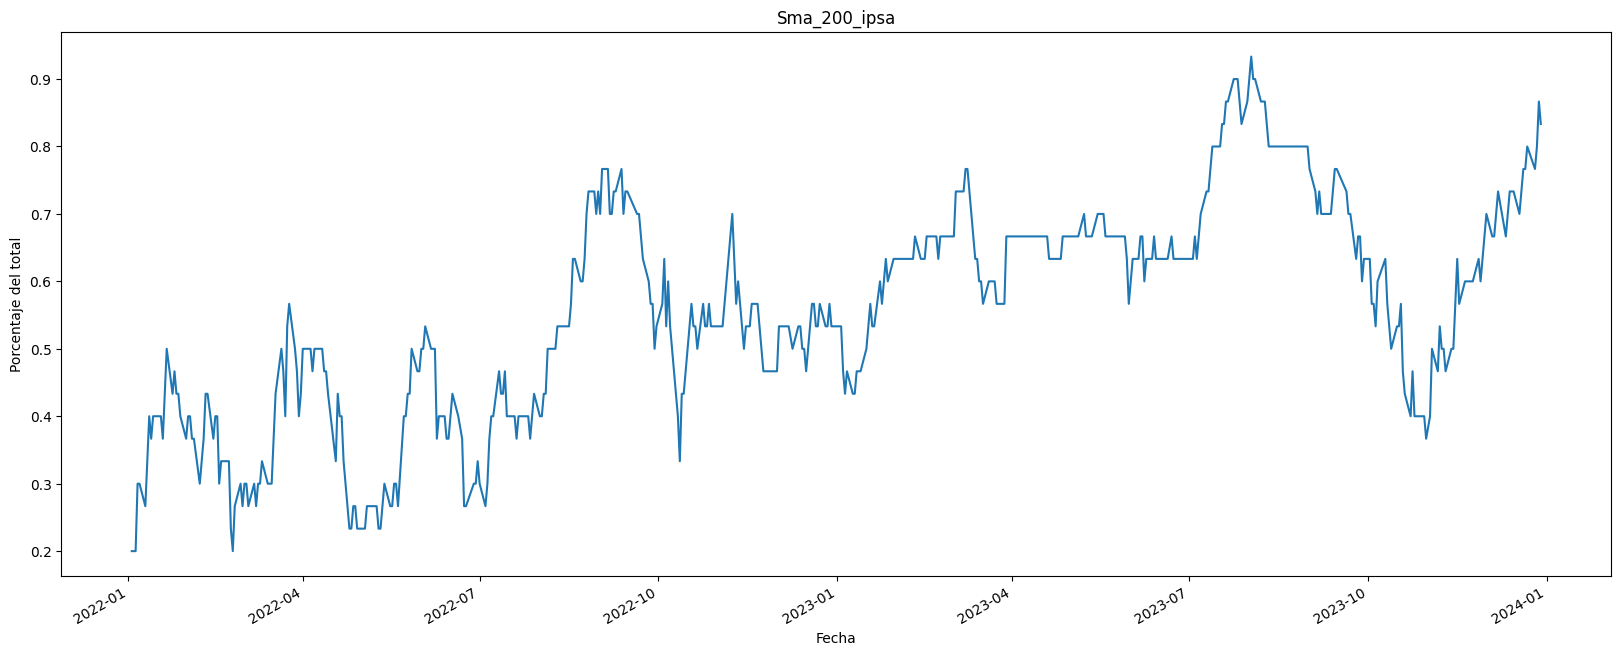

In [102]:
df_msa_200.index = pd.to_datetime(df_msa_200.index)

start_year = 2022
end_year = 2023
filtro_df_msa200_año = df_msa_200.loc[(df_msa_200.index.year >= start_year) & (df_msa_200.index.year <= end_year)]
filtro_df_msa200_año['promedio_msa_200'].plot(figsize = (20,8))
plt.xlabel('Fecha')
plt.title('Sma_200_ipsa')
plt.ylabel('Porcentaje del total')
plt.show()